In [ ]:
!pip install rdkit-pypi
!pip install mordred
!pip install lazypredict
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 42.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.7 MB/s eta 0:00:00
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176723 sha256=56df4d31cfa9a2a20de38f14d03fd409f7bc142b9ef31c1e3a36f593af7ac32e
  Stored in directory: /root/.cache/pip/wheels/a7/4f/b8/d4c6591f6ac944aaced7865b349477695f662388ad958743c7
Successfully built mordred
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wh

In [ ]:
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

# https://pandas.pydata.org
import pandas as pd

# https://numpy.org/doc/stable/release.html
import numpy as np

#https://github.com/mordred-descriptor/mordred
from mordred import Calculator, descriptors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier
import lightgbm as lgb
# from drive.MyDrive.gpn_practice.NovabiomPredUtils import NovaPredictTools as npt
import keras
import numpy as np
import pandas as pd
import zipfile
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import RobustScaler
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Пример применения RDKit для визулизации

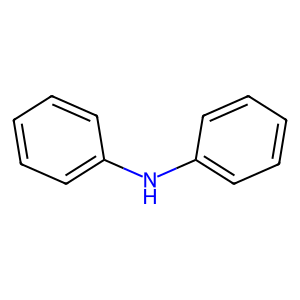

In [ ]:
# Чтение файла, конвертация файла в объект rdkit.Chem.rdchem.Mol
m = Chem.MolFromMolFile('/content/drive/MyDrive/gpn_practice/Conformer3D_compound_CID_11487.sdf')

from rdkit.Chem import Draw

# Визуализация структуры
img = Draw.MolToImage(m)
img

In [ ]:
# Конвертация rdkit.Chem.rdchem.Mol в фингерпринт
s = Chem.MolToSmiles(m)
s

'c1ccc(Nc2ccccc2)cc1'

In [ ]:
chosen_descriptors = ['BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'EState_VSA1', 'EState_VSA10', 'EState_VSA11', 'EState_VSA2', 'EState_VSA3', 'EState_VSA4', 'EState_VSA5', 'EState_VSA6', 'EState_VSA7', 'EState_VSA8', 'EState_VSA9', 'ExactMolWt', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'FractionCSP3', 'HallKierAlpha', 'HeavyAtomCount', 'HeavyAtomMolWt', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'MaxAbsEStateIndex', 'MaxAbsPartialCharge', 'MaxEStateIndex', 'MaxPartialCharge', 'MinAbsEStateIndex', 'MinAbsPartialCharge', 'MinEStateIndex', 'MinPartialCharge', 'MolLogP', 'MolMR', 'MolWt', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'NumAromaticRings', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRadicalElectrons', 'NumRotatableBonds', 'NumSaturatedCarbocycles', 'NumSaturatedHeterocycles', 'NumSaturatedRings', 'NumValenceElectrons', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'RingCount', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'SlogP_VSA9', 'TPSA', 'VSA_EState1', 'VSA_EState10', 'VSA_EState2', 'VSA_EState3', 'VSA_EState4', 'VSA_EState5', 'VSA_EState6', 'VSA_EState7', 'VSA_EState8', 'VSA_EState9', 'fr_Al_COO', 'fr_Al_OH', 'fr_Al_OH_noTert', 'fr_ArN', 'fr_Ar_COO', 'fr_Ar_N', 'fr_Ar_NH', 'fr_Ar_OH', 'fr_COO', 'fr_COO2', 'fr_C_O', 'fr_C_O_noCOO', 'fr_C_S', 'fr_HOCCN', 'fr_Imine', 'fr_NH0', 'fr_NH1', 'fr_NH2', 'fr_N_O', 'fr_Ndealkylation1', 'fr_Ndealkylation2', 'fr_Nhpyrrole', 'fr_SH', 'fr_aldehyde', 'fr_alkyl_carbamate', 'fr_alkyl_halide', 'fr_allylic_oxid', 'fr_amide', 'fr_amidine', 'fr_aniline', 'fr_aryl_methyl', 'fr_azide', 'fr_azo', 'fr_barbitur', 'fr_benzene', 'fr_benzodiazepine', 'fr_bicyclic', 'fr_diazo', 'fr_dihydropyridine', 'fr_epoxide', 'fr_ester', 'fr_ether', 'fr_furan', 'fr_guanido', 'fr_halogen', 'fr_hdrzine', 'fr_hdrzone', 'fr_imidazole', 'fr_imide', 'fr_isocyan', 'fr_isothiocyan', 'fr_ketone', 'fr_ketone_Topliss', 'fr_lactam', 'fr_lactone', 'fr_methoxy', 'fr_morpholine', 'fr_nitrile', 'fr_nitro', 'fr_nitro_arom', 'fr_nitro_arom_nonortho', 'fr_nitroso', 'fr_oxazole', 'fr_oxime', 'fr_para_hydroxylation', 'fr_phenol', 'fr_phenol_noOrthoHbond', 'fr_phos_acid', 'fr_phos_ester', 'fr_piperdine', 'fr_piperzine', 'fr_priamide', 'fr_prisulfonamd', 'fr_pyridine', 'fr_quatN', 'fr_sulfide', 'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene', 'fr_tetrazole', 'fr_thiazole', 'fr_thiocyan', 'fr_thiophene', 'fr_unbrch_alkane', 'fr_urea', 'qed']

In [ ]:
# Получение дескрипторов из фингерпринтов
from rdkit.Chem import Descriptors
import rdkit

vals = rdkit.Chem.Descriptors.MolWt(m)
vals

169.227

In [ ]:
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator
mol = Chem.MolFromSmiles(s)
mol_descriptor_calculator = MolecularDescriptorCalculator(chosen_descriptors)

# use molecular descriptor calculator on RDKit mol object
list_of_descriptor_vals = mol_descriptor_calculator.CalcDescriptors(mol)
list_of_descriptor_vals

(2.1614757505786617,
 315.89864866417315,
 8.932875131431276,
 7.27350269189626,
 7.27350269189626,
 6.449489742783179,
 4.321367205045919,
 4.321367205045919,
 2.857050807568879,
 2.857050807568879,
 1.836253271292093,
 1.836253271292093,
 1.2096390384386815,
 1.2096390384386815,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 11.374772549367124,
 0.0,
 0.0,
 60.6636706846161,
 5.316788604006331,
 0.0,
 169.089149352,
 0.5384615384615384,
 0.9230769230769231,
 1.3076923076923077,
 0.0,
 -1.7599999999999993,
 13,
 158.13899999999998,
 1589.7182302135147,
 7.866895638429664,
 3.7642110484220974,
 2.089799938442597,
 78.03835950916904,
 3.303888888888889,
 0.3555271921456535,
 3.303888888888889,
 0.038370136695393395,
 1.1191666666666669,
 0.038370136695393395,
 1.1191666666666669,
 -0.3555271921456535,
 3.430200000000001,
 56.16670000000003,
 169.227,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 2,
 1,
 1,
 1,
 0,
 2,
 0,
 0,
 0,
 64,
 5.316788604006331,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 36.3982024

# Обработка данных

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/gpn_practice/df_for_predict_with_all_columns.csv')
df.drop(['PDSC 210С, мин.1', 'Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
df

,diphenylamine,Irganox L-135,agidol,Irganox L-06,Irganox L-57,Irganox L-67,"PDSC 210С, мин",MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,...,NOCount_1,NumAromaticCarbocycles_1,NumAromaticRings_1,NumHAcceptors_1,NumHeteroatoms_1,NumRotatableBonds_1,RingCount_1,MolLogP_1,MolMR_1,fr_benzene_1
0,0.30,0.30,NaN,NaN,NaN,NaN,8.90,8.04,-0.71,8.04,...,3.00,1.00,1.00,3.00,3.00,21.00,1.00,10.33,159.72,1.00
1,0.90,0.30,NaN,NaN,NaN,NaN,18.70,8.04,-0.71,8.04,...,3.00,1.00,1.00,3.00,3.00,21.00,1.00,10.33,159.72,1.00
2,0.30,0.90,NaN,NaN,NaN,NaN,18.90,8.04,-0.71,8.04,...,3.00,1.00,1.00,3.00,3.00,21.00,1.00,10.33,159.72,1.00
3,0.90,0.90,NaN,NaN,NaN,NaN,25.90,8.04,-0.71,8.04,...,3.00,1.00,1.00,3.00,3.00,21.00,1.00,10.33,159.72,1.00
4,0.30,NaN,0.30,NaN,NaN,NaN,14.20,8.04,-0.71,8.04,...,1.00,1.00,1.00,1.00,1.00,2.00,1.00,4.30,70.24,1.00
5,0.90,NaN,0.30,NaN,NaN,NaN,18.90,8.04,-0.71,8.04,...,1.00,1.00,1.00,1.00,1.00,2.00,1.00,4.30,70.24,1.00
6,0.30,NaN,0.90,NaN,NaN,NaN,18.50,8.04,-0.71,8.04,...,1.00,1.00,1.00,1.00,1.00,2.00,1.00,4.30,70.24,1.00
7,0.90,NaN,0.90,NaN,NaN,NaN,22.30,8.04,-0.71,8.04,...,1.00,1.00,1.00,1.00,1.00,2.00,1.00,4.30,70.24,1.00
8,NaN,0.30,NaN,0.30,NaN,NaN,15.60,14.11,-5.63,14.11,...,1.00,3.00,3.00,1.00,1.00,6.00,3.00,7.19,110.68,3.00
9,NaN,0.30,NaN,0.90,NaN,NaN,37.90,14.11,-5.63,14.11,...,1.00,3.00,3.00,1.00,1.00,6.00,3.00,7.19,110.68,3.00


In [ ]:
ds_for_features = df.drop(['diphenylamine',	'Irganox L-135',	'agidol',	'Irganox L-06',	'Irganox L-57',	'Irganox L-67',	'PDSC 210С, мин'], axis = 1)

In [ ]:
for i in ds_for_features.columns.tolist():
  count = (abs(ds_for_features[i]) <= 0.01).sum()
  if count >=1:
    ds_for_features.drop(i, axis = 1, inplace = True)

In [ ]:
ds_for_features

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,...,NOCount_1,NumAromaticCarbocycles_1,NumAromaticRings_1,NumHAcceptors_1,NumHeteroatoms_1,NumRotatableBonds_1,RingCount_1,MolLogP_1,MolMR_1,fr_benzene_1
0,8.04,-0.71,8.04,0.28,0.73,169.23,158.14,169.09,64.00,0.17,...,3.00,1.00,1.00,3.00,3.00,21.00,1.00,10.33,159.72,1.00
1,8.04,-0.71,8.04,0.28,0.73,169.23,158.14,169.09,64.00,0.17,...,3.00,1.00,1.00,3.00,3.00,21.00,1.00,10.33,159.72,1.00
2,8.04,-0.71,8.04,0.28,0.73,169.23,158.14,169.09,64.00,0.17,...,3.00,1.00,1.00,3.00,3.00,21.00,1.00,10.33,159.72,1.00
3,8.04,-0.71,8.04,0.28,0.73,169.23,158.14,169.09,64.00,0.17,...,3.00,1.00,1.00,3.00,3.00,21.00,1.00,10.33,159.72,1.00
4,8.04,-0.71,8.04,0.28,0.73,169.23,158.14,169.09,64.00,0.17,...,1.00,1.00,1.00,1.00,1.00,2.00,1.00,4.30,70.24,1.00
5,8.04,-0.71,8.04,0.28,0.73,169.23,158.14,169.09,64.00,0.17,...,1.00,1.00,1.00,1.00,1.00,2.00,1.00,4.30,70.24,1.00
6,8.04,-0.71,8.04,0.28,0.73,169.23,158.14,169.09,64.00,0.17,...,1.00,1.00,1.00,1.00,1.00,2.00,1.00,4.30,70.24,1.00
7,8.04,-0.71,8.04,0.28,0.73,169.23,158.14,169.09,64.00,0.17,...,1.00,1.00,1.00,1.00,1.00,2.00,1.00,4.30,70.24,1.00
8,14.11,-5.63,14.11,2.56,0.15,516.85,456.37,516.45,214.00,0.31,...,1.00,3.00,3.00,1.00,1.00,6.00,3.00,7.19,110.68,3.00
9,14.11,-5.63,14.11,2.56,0.15,516.85,456.37,516.45,214.00,0.31,...,1.00,3.00,3.00,1.00,1.00,6.00,3.00,7.19,110.68,3.00


In [ ]:
for i in ds_for_features.columns.tolist():
  count = len(ds_for_features[i].unique())
  if count < 4:
    ds_for_features.drop(i, axis = 1, inplace = True)

In [ ]:
len(ds_for_features['NOCount_1'].unique())

KeyError: ignored

In [ ]:
from scipy import stats

def correlation_test(df):
    pearson_stat = df.corr(method=lambda x, y: stats.pearsonr(x, y)[0])
    pearson_p = df.corr(method=lambda x, y: stats.pearsonr(x, y)[1])
    spearman_stat = df.corr(method=lambda x, y: stats.spearmanr(x, y)[0])
    spearman_p = df.corr(method=lambda x, y: stats.spearmanr(x, y)[1])

    pearson_p = (pearson_p - np.eye(df.shape[1])).round(10)
    spearman_p = (spearman_p - np.eye(df.shape[1])).round(3)

    return pearson_stat, pearson_p, spearman_stat, spearman_p

a, p_val_pearson, b, spearman_p = correlation_test(ds_for_features)
s = p_val_pearson

In [ ]:
s

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,...,NOCount_1,NumAromaticCarbocycles_1,NumAromaticRings_1,NumHAcceptors_1,NumHeteroatoms_1,NumRotatableBonds_1,RingCount_1,MolLogP_1,MolMR_1,fr_benzene_1
MaxEStateIndex,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.07,0.02,0.02,0.07,0.07,0.93,0.02,0.40,0.58,0.02
MinEStateIndex,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.87,0.00,0.10,0.28,0.00
MaxAbsEStateIndex,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.07,0.02,0.02,0.07,0.07,0.93,0.02,0.40,0.58,0.02
MinAbsEStateIndex,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.88,0.00,0.11,0.30,0.00
qed,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.07,0.02,0.02,0.07,0.07,0.93,0.02,0.40,0.58,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NumRotatableBonds_1,0.93,0.87,0.93,0.88,0.93,0.93,0.93,0.93,0.92,0.87,...,0.00,0.12,0.12,0.00,0.00,0.00,0.12,0.00,0.00,0.12
RingCount_1,0.02,0.00,0.02,0.00,0.02,0.01,0.01,0.01,0.01,0.00,...,0.00,0.00,0.00,0.00,0.00,0.12,0.00,0.90,0.74,0.00
MolLogP_1,0.40,0.10,0.40,0.11,0.40,0.34,0.35,0.34,0.32,0.08,...,0.03,0.90,0.90,0.03,0.03,0.00,0.90,0.00,0.00,0.90
MolMR_1,0.58,0.28,0.58,0.30,0.58,0.53,0.55,0.53,0.52,0.26,...,0.00,0.74,0.74,0.00,0.00,0.00,0.74,0.00,0.00,0.74


In [ ]:
a

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,...,NOCount_1,NumAromaticCarbocycles_1,NumAromaticRings_1,NumHAcceptors_1,NumHeteroatoms_1,NumRotatableBonds_1,RingCount_1,MolLogP_1,MolMR_1,fr_benzene_1
MaxEStateIndex,1.00,-0.71,1.00,0.79,-1.00,1.00,1.00,1.00,1.00,0.57,...,-0.32,0.40,0.40,-0.32,-0.32,0.02,0.40,0.15,0.10,0.40
MinEStateIndex,-0.71,1.00,-0.71,-0.99,0.71,-0.76,-0.75,-0.76,-0.78,-0.98,...,0.63,-0.79,-0.79,0.63,0.63,-0.03,-0.79,-0.30,-0.20,-0.79
MaxAbsEStateIndex,1.00,-0.71,1.00,0.79,-1.00,1.00,1.00,1.00,1.00,0.57,...,-0.32,0.40,0.40,-0.32,-0.32,0.02,0.40,0.15,0.10,0.40
MinAbsEStateIndex,0.79,-0.99,0.79,1.00,-0.79,0.84,0.83,0.84,0.85,0.95,...,-0.60,0.75,0.75,-0.60,-0.60,0.03,0.75,0.29,0.19,0.75
qed,-1.00,0.71,-1.00,-0.79,1.00,-1.00,-1.00,-1.00,-0.99,-0.57,...,0.32,-0.40,-0.40,0.32,0.32,-0.02,-0.40,-0.15,-0.10,-0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NumRotatableBonds_1,0.02,-0.03,0.02,0.03,-0.02,0.02,0.02,0.02,0.02,0.03,...,0.49,-0.28,-0.28,0.49,0.49,1.00,-0.28,0.91,0.88,-0.28
RingCount_1,0.40,-0.79,0.40,0.75,-0.40,0.46,0.44,0.46,0.47,0.81,...,-0.53,1.00,1.00,-0.53,-0.53,-0.28,1.00,-0.02,-0.06,1.00
MolLogP_1,0.15,-0.30,0.15,0.29,-0.15,0.17,0.17,0.17,0.18,0.31,...,0.39,-0.02,-0.02,0.39,0.39,0.91,-0.02,1.00,0.98,-0.02
MolMR_1,0.10,-0.20,0.10,0.19,-0.10,0.11,0.11,0.11,0.12,0.20,...,0.54,-0.06,-0.06,0.54,0.54,0.88,-0.06,0.98,1.00,-0.06


In [ ]:
data_corr=ds_for_features.corr()
data_corr

,MaxEStateIndex_1,MinEStateIndex_1,MaxAbsEStateIndex_1,MinAbsEStateIndex_1,qed_1,MolWt_1,HeavyAtomMolWt_1,ExactMolWt_1,NumValenceElectrons_1,MaxPartialCharge_1,...,EState_VSA1_1,EState_VSA9_1,VSA_EState1_1,VSA_EState3_1,VSA_EState4_1,VSA_EState6_1,HeavyAtomCount_1,NumRotatableBonds_1,MolLogP_1,MolMR_1
MaxEStateIndex_1,1.00,-0.60,1.00,0.76,-0.64,0.71,0.71,0.71,0.72,0.46,...,0.57,0.67,0.69,0.50,-0.05,0.46,0.68,0.53,0.47,0.61
MinEStateIndex_1,-0.60,1.00,-0.60,0.07,0.59,-0.79,-0.82,-0.79,-0.76,0.32,...,-0.81,-0.56,-0.64,0.35,0.26,0.44,-0.82,-0.48,-0.73,-0.81
MaxAbsEStateIndex_1,1.00,-0.60,1.00,0.76,-0.64,0.71,0.71,0.71,0.72,0.46,...,0.57,0.67,0.69,0.50,-0.05,0.46,0.68,0.53,0.47,0.61
MinAbsEStateIndex_1,0.76,0.07,0.76,1.00,-0.30,0.24,0.22,0.24,0.29,0.86,...,0.06,0.39,0.35,0.92,0.08,0.93,0.18,0.27,-0.00,0.11
qed_1,-0.64,0.59,-0.64,-0.30,1.00,-0.88,-0.88,-0.88,-0.88,-0.15,...,-0.86,-0.83,-0.85,-0.04,-0.38,-0.04,-0.88,-0.96,-0.87,-0.87
MolWt_1,0.71,-0.79,0.71,0.24,-0.88,1.00,1.00,1.00,1.00,0.16,...,0.98,0.94,0.97,0.03,-0.10,-0.09,1.00,0.89,0.96,0.99
HeavyAtomMolWt_1,0.71,-0.82,0.71,0.22,-0.88,1.00,1.00,1.00,0.99,0.12,...,0.99,0.93,0.96,-0.00,-0.09,-0.12,1.00,0.88,0.96,0.99
ExactMolWt_1,0.71,-0.79,0.71,0.24,-0.88,1.00,1.00,1.00,1.00,0.16,...,0.98,0.94,0.97,0.03,-0.10,-0.09,1.00,0.89,0.96,0.99
NumValenceElectrons_1,0.72,-0.76,0.72,0.29,-0.88,1.00,0.99,1.00,1.00,0.22,...,0.97,0.96,0.98,0.09,-0.11,-0.04,0.99,0.90,0.95,0.98
MaxPartialCharge_1,0.46,0.32,0.46,0.86,-0.15,0.16,0.12,0.16,0.22,1.00,...,0.02,0.44,0.36,0.97,-0.11,0.90,0.09,0.26,-0.00,0.05


<Axes: >

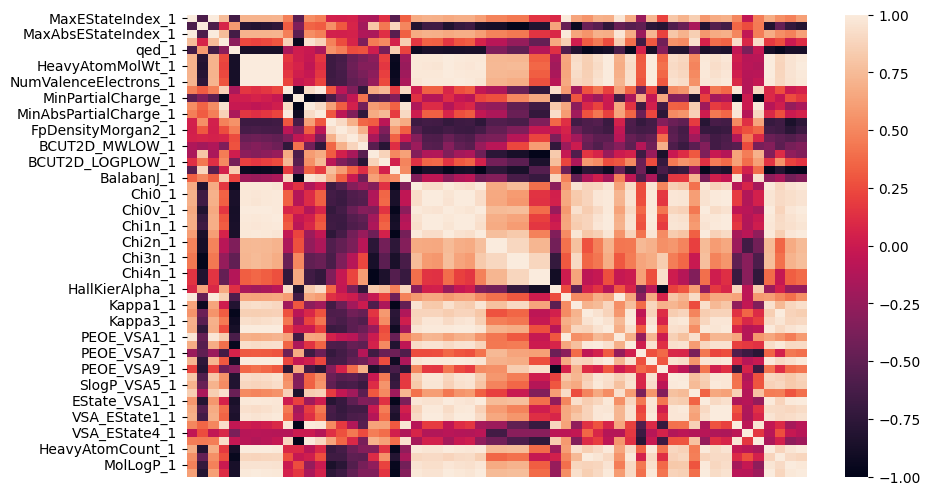

In [ ]:
cols_to_analyse = ds_for_features.columns

# data_corr=X[comm_bact_without_cor_l].corr()
# data_corr = data_corr.head(68)

plt.figure(figsize = (10,6))
sns.heatmap(data_corr,  xticklabels=False)

In [ ]:
col_cor_data = data_corr.columns
comm_bact_without_cor = data_corr.index
for i in col_cor_data:
    k = data_corr[abs(data_corr[i])> 0.9]
    k_list = k.index
    comm_bact_without_cor = list(set(comm_bact_without_cor)-set(k_list))
    comm_bact_without_cor.append(i)

comm_bact_without_cor_l = list(set(comm_bact_without_cor))
len(comm_bact_without_cor_l)

10

In [ ]:
data_corr=ds_for_features[comm_bact_without_cor_l].corr()
# data_corr = data_corr.head(68)

plt.figure(figsize = (10,6))
sns.heatmap(data_corr,  xticklabels=False)

NameError: ignored

In [ ]:
feature_ds = ds_for_features[comm_bact_without_cor_l]
feature_ds

,TPSA_1,PEOE_VSA9_1,VSA_EState6_1,MolMR_1,PEOE_VSA7_1,BCUT2D_MWLOW_1,BCUT2D_LOGPLOW_1,Chi2v_1,FpDensityMorgan3_1,VSA_EState4_1
0,46.53,12.04,-5.29,159.72,40.27,-0.25,-2.61,5.82,1.70,-18.28
1,46.53,12.04,-5.29,159.72,40.27,-0.25,-2.61,5.82,1.70,-18.28
2,46.53,12.04,-5.29,159.72,40.27,-0.25,-2.61,5.82,1.70,-18.28
3,46.53,12.04,-5.29,159.72,40.27,-0.25,-2.61,5.82,1.70,-18.28
4,20.23,2.74,-3.68,70.24,28.81,-0.25,-2.57,3.20,1.88,-14.58
5,20.23,2.74,-3.68,70.24,28.81,-0.25,-2.57,3.20,1.88,-14.58
6,20.23,2.74,-3.68,70.24,28.81,-0.25,-2.57,3.20,1.88,-14.58
7,20.23,2.74,-3.68,70.24,28.81,-0.25,-2.57,3.20,1.88,-14.58
8,3.24,16.45,-16.66,110.68,49.01,-0.25,-2.75,4.87,2.24,-13.81
9,3.24,16.45,-16.66,110.68,49.01,-0.25,-2.75,4.87,2.24,-13.81


In [ ]:
feature_ds.columns

Index(['TPSA_1', 'PEOE_VSA9_1', 'VSA_EState6_1', 'MolMR_1', 'PEOE_VSA7_1',
       'BCUT2D_MWLOW_1', 'BCUT2D_LOGPLOW_1', 'Chi2v_1', 'FpDensityMorgan3_1',
       'VSA_EState4_1'],
      dtype='object')

In [ ]:
df_2 = df[['TPSA', 'PEOE_VSA9', 'VSA_EState6', 'MolMR', 'PEOE_VSA7',
       'BCUT2D_MWLOW', 'BCUT2D_LOGPLOW', 'Chi2v', 'FpDensityMorgan3',
       'VSA_EState4']]


# 'BCUT2D_LOGPLOW'

In [ ]:
df_4 = pd.concat([df[['diphenylamine',	'Irganox L-135',	'agidol',	'Irganox L-06',	'Irganox L-57',	'Irganox L-67',	'PDSC 210С, мин']], df_2, feature_ds], axis = 1)
df_4

,diphenylamine,Irganox L-135,agidol,Irganox L-06,Irganox L-57,Irganox L-67,"PDSC 210С, мин",TPSA,PEOE_VSA9,VSA_EState6,...,TPSA_1,PEOE_VSA9_1,VSA_EState6_1,MolMR_1,PEOE_VSA7_1,BCUT2D_MWLOW_1,BCUT2D_LOGPLOW_1,Chi2v_1,FpDensityMorgan3_1,VSA_EState4_1
0,0.30,0.30,NaN,NaN,NaN,NaN,8.90,12.03,13.71,-6.86,...,46.53,12.04,-5.29,159.72,40.27,-0.25,-2.61,5.82,1.70,-18.28
1,0.90,0.30,NaN,NaN,NaN,NaN,18.70,12.03,13.71,-6.86,...,46.53,12.04,-5.29,159.72,40.27,-0.25,-2.61,5.82,1.70,-18.28
2,0.30,0.90,NaN,NaN,NaN,NaN,18.90,12.03,13.71,-6.86,...,46.53,12.04,-5.29,159.72,40.27,-0.25,-2.61,5.82,1.70,-18.28
3,0.90,0.90,NaN,NaN,NaN,NaN,25.90,12.03,13.71,-6.86,...,46.53,12.04,-5.29,159.72,40.27,-0.25,-2.61,5.82,1.70,-18.28
4,0.30,NaN,0.30,NaN,NaN,NaN,14.20,12.03,13.71,-6.86,...,20.23,2.74,-3.68,70.24,28.81,-0.25,-2.57,3.20,1.88,-14.58
5,0.90,NaN,0.30,NaN,NaN,NaN,18.90,12.03,13.71,-6.86,...,20.23,2.74,-3.68,70.24,28.81,-0.25,-2.57,3.20,1.88,-14.58
6,0.30,NaN,0.90,NaN,NaN,NaN,18.50,12.03,13.71,-6.86,...,20.23,2.74,-3.68,70.24,28.81,-0.25,-2.57,3.20,1.88,-14.58
7,0.90,NaN,0.90,NaN,NaN,NaN,22.30,12.03,13.71,-6.86,...,20.23,2.74,-3.68,70.24,28.81,-0.25,-2.57,3.20,1.88,-14.58
8,NaN,0.30,NaN,0.30,NaN,NaN,15.60,46.53,12.04,-5.29,...,3.24,16.45,-16.66,110.68,49.01,-0.25,-2.75,4.87,2.24,-13.81
9,NaN,0.30,NaN,0.90,NaN,NaN,37.90,46.53,12.04,-5.29,...,3.24,16.45,-16.66,110.68,49.01,-0.25,-2.75,4.87,2.24,-13.81


In [ ]:
df_4 = df_4.fillna(0)
df_4

,diphenylamine,Irganox L-135,agidol,Irganox L-06,Irganox L-57,Irganox L-67,"PDSC 210С, мин",TPSA,PEOE_VSA9,VSA_EState6,...,TPSA_1,PEOE_VSA9_1,VSA_EState6_1,MolMR_1,PEOE_VSA7_1,BCUT2D_MWLOW_1,BCUT2D_LOGPLOW_1,Chi2v_1,FpDensityMorgan3_1,VSA_EState4_1
0,0.30,0.30,0.00,0.00,0.00,0.00,8.90,12.03,13.71,-6.86,...,46.53,12.04,-5.29,159.72,40.27,-0.25,-2.61,5.82,1.70,-18.28
1,0.90,0.30,0.00,0.00,0.00,0.00,18.70,12.03,13.71,-6.86,...,46.53,12.04,-5.29,159.72,40.27,-0.25,-2.61,5.82,1.70,-18.28
2,0.30,0.90,0.00,0.00,0.00,0.00,18.90,12.03,13.71,-6.86,...,46.53,12.04,-5.29,159.72,40.27,-0.25,-2.61,5.82,1.70,-18.28
3,0.90,0.90,0.00,0.00,0.00,0.00,25.90,12.03,13.71,-6.86,...,46.53,12.04,-5.29,159.72,40.27,-0.25,-2.61,5.82,1.70,-18.28
4,0.30,0.00,0.30,0.00,0.00,0.00,14.20,12.03,13.71,-6.86,...,20.23,2.74,-3.68,70.24,28.81,-0.25,-2.57,3.20,1.88,-14.58
5,0.90,0.00,0.30,0.00,0.00,0.00,18.90,12.03,13.71,-6.86,...,20.23,2.74,-3.68,70.24,28.81,-0.25,-2.57,3.20,1.88,-14.58
6,0.30,0.00,0.90,0.00,0.00,0.00,18.50,12.03,13.71,-6.86,...,20.23,2.74,-3.68,70.24,28.81,-0.25,-2.57,3.20,1.88,-14.58
7,0.90,0.00,0.90,0.00,0.00,0.00,22.30,12.03,13.71,-6.86,...,20.23,2.74,-3.68,70.24,28.81,-0.25,-2.57,3.20,1.88,-14.58
8,0.00,0.30,0.00,0.30,0.00,0.00,15.60,46.53,12.04,-5.29,...,3.24,16.45,-16.66,110.68,49.01,-0.25,-2.75,4.87,2.24,-13.81
9,0.00,0.30,0.00,0.90,0.00,0.00,37.90,46.53,12.04,-5.29,...,3.24,16.45,-16.66,110.68,49.01,-0.25,-2.75,4.87,2.24,-13.81


In [ ]:
df_4.to_csv('/content/drive/MyDrive/gpn_practice/df_for_p_selected_features.csv')

NameError: ignored

# **Обучение и отбор моделей**

In [ ]:
df_4 = pd.read_csv('/content/drive/MyDrive/gpn_practice/df_for_p_selected_features.csv')
df_4.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
df_4.drop(['BCUT2D_MWLOW_1', 'BCUT2D_MWLOW'], axis = 1, inplace = True)

In [ ]:
df_4.drop(['diphenylamine',	'Irganox L-135',	'agidol',	'Irganox L-06',	'Irganox L-57',	'Irganox L-67'], axis = 1, inplace = True)


In [ ]:
df_5 = df_4.drop(['TPSA_1', 'PEOE_VSA9_1', 'VSA_EState6_1', 'MolMR_1', 'PEOE_VSA7_1',
        'BCUT2D_LOGPLOW_1', 'Chi2v_1', 'FpDensityMorgan3_1',
       'VSA_EState4_1'], axis = 1)

<Axes: >

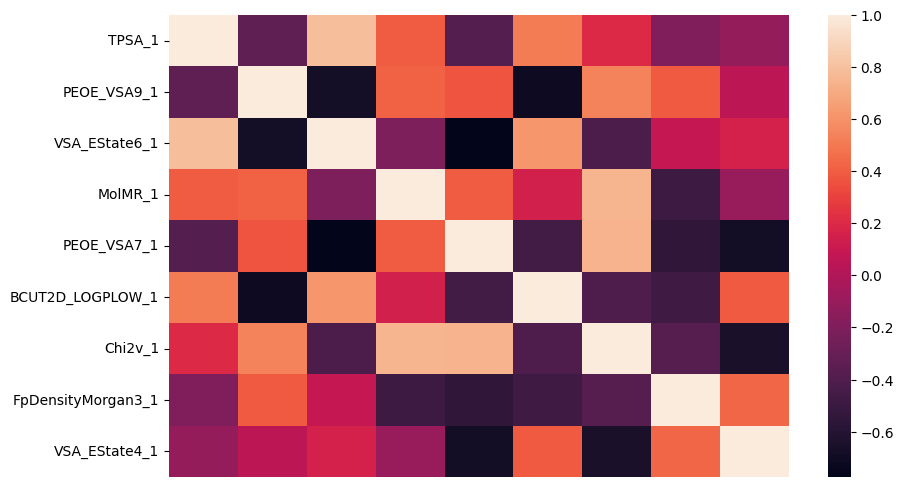

In [ ]:
data_corr=df_5.corr()
# data_corr = data_corr.head(68)

plt.figure(figsize = (10,6))
sns.heatmap(data_corr,  xticklabels=False)


In [ ]:
y = df_4['PDSC 210С, мин']
x = df_4.drop(['PDSC 210С, мин'], axis = 1)
# y = df_5['PDSC 210С, мин']
# x = df_5.drop(['PDSC 210С, мин'], axis = 1)
# s = npt.Lazyregressor_vae(x, y)
# print(s)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x)
x_sc = scaler.transform(x)

In [ ]:
x.to_csv('/content/drive/MyDrive/gpn_practice/data_for_predict7_7_3.csv')

In [ ]:
y.describe()

count   32.00
mean    27.11
std     13.50
min      8.90
25%     18.65
50%     23.80
75%     32.23
max     62.90
Name: PDSC 210С, мин, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 64)
scaler = MinMaxScaler()
scaler.fit(X_train)
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models,pred = reg.fit(x_train, x_test, y_train, y_test)
models

 60%|█████▉    | 25/42 [00:01<00:00, 22.02it/s]

LassoLarsIC model failed to execute
You are using LassoLarsIC in the case where the number of samples is smaller than the number of features. In this setting, getting a good estimate for the variance of the noise is not possible. Provide an estimate of the noise variance in the constructor.


 74%|███████▍  | 31/42 [00:01<00:00, 19.50it/s]

RANSACRegressor model failed to execute
`min_samples` may not be larger than number of samples: n_samples = 25.


100%|██████████| 42/42 [00:02<00:00, 15.73it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
KernelRidge,3.60,-7.67,25.48,0.02
GaussianProcessRegressor,2.58,-4.28,19.88,0.03
LinearSVR,1.48,-0.60,10.95,0.02
ExtraTreeRegressor,1.40,-0.34,10.02,0.02
QuantileRegressor,1.34,-0.14,9.25,0.06
SVR,1.31,-0.03,8.78,0.04
LGBMRegressor,1.30,-0.00,8.67,0.16
DummyRegressor,1.30,-0.00,8.67,0.02
HistGradientBoostingRegressor,1.30,-0.00,8.67,0.14


In [ ]:
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
scaler = MinMaxScaler()
scaler.fit(x)
x_sc = scaler.transform(x)
clf = linear_model.PoissonRegressor()
clf.fit(x_sc, y)
clf_2 = linear_model.HuberRegressor()
clf_2.fit(x_sc, y)
clf_3 = xgb.XGBRegressor(verbosity=0)
clf_3.fit(x_sc, y)
clf_4 = linear_model.RidgeCV()
clf_4.fit(x_sc, y)
clf_5 = linear_model.Ridge()
clf_5.fit(x_sc, y)
clf_6 = linear_model.ElasticNetCV()
clf_6.fit(x_sc, y)
clf_7 = linear_model.LassoCV()
clf_7.fit(x_sc, y)
clf_8 = linear_model.LassoLarsCV()
clf_8.fit(x_sc, y)
clf_9 = linear_model.OrthogonalMatchingPursuit()
clf_9.fit(x_sc, y)
clf_10 = linear_model.PassiveAggressiveRegressor( C=0.7, fit_intercept=True, max_iter=1000, tol=0.001, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, shuffle=True, verbose=0, loss='epsilon_insensitive', epsilon=0.1, random_state=None, warm_start=False, average=False)
clf_10.fit(x_sc, y)
clf_11 = linear_model.GammaRegressor(alpha=0.5)
clf_11.fit(x_sc, y)
clf_12 = RandomForestRegressor()
clf_12.fit(x_sc, y)

RandomForestRegressor()

# **автоматизированный вход на тестирование**

In [ ]:
x

,diphenylamine,Irganox L-135,agidol,Irganox L-06,Irganox L-57,Irganox L-67,TPSA,PEOE_VSA9,VSA_EState6,MolMR,...,TPSA_1,PEOE_VSA9_1,VSA_EState6_1,MolMR_1,PEOE_VSA7_1,BCUT2D_MWLOW_1,BCUT2D_LOGPLOW_1,Chi2v_1,FpDensityMorgan3_1,VSA_EState4_1
0,0.30,0.30,0.00,0.00,0.00,0.00,12.03,13.71,-6.86,56.17,...,46.53,12.04,-5.29,159.72,40.27,-0.25,-2.61,5.82,1.70,-18.28
1,0.90,0.30,0.00,0.00,0.00,0.00,12.03,13.71,-6.86,56.17,...,46.53,12.04,-5.29,159.72,40.27,-0.25,-2.61,5.82,1.70,-18.28
2,0.30,0.90,0.00,0.00,0.00,0.00,12.03,13.71,-6.86,56.17,...,46.53,12.04,-5.29,159.72,40.27,-0.25,-2.61,5.82,1.70,-18.28
3,0.90,0.90,0.00,0.00,0.00,0.00,12.03,13.71,-6.86,56.17,...,46.53,12.04,-5.29,159.72,40.27,-0.25,-2.61,5.82,1.70,-18.28
4,0.30,0.00,0.30,0.00,0.00,0.00,12.03,13.71,-6.86,56.17,...,20.23,2.74,-3.68,70.24,28.81,-0.25,-2.57,3.20,1.88,-14.58
5,0.90,0.00,0.30,0.00,0.00,0.00,12.03,13.71,-6.86,56.17,...,20.23,2.74,-3.68,70.24,28.81,-0.25,-2.57,3.20,1.88,-14.58
6,0.30,0.00,0.90,0.00,0.00,0.00,12.03,13.71,-6.86,56.17,...,20.23,2.74,-3.68,70.24,28.81,-0.25,-2.57,3.20,1.88,-14.58
7,0.90,0.00,0.90,0.00,0.00,0.00,12.03,13.71,-6.86,56.17,...,20.23,2.74,-3.68,70.24,28.81,-0.25,-2.57,3.20,1.88,-14.58
8,0.00,0.30,0.00,0.30,0.00,0.00,46.53,12.04,-5.29,159.72,...,3.24,16.45,-16.66,110.68,49.01,-0.25,-2.75,4.87,2.24,-13.81
9,0.00,0.30,0.00,0.90,0.00,0.00,46.53,12.04,-5.29,159.72,...,3.24,16.45,-16.66,110.68,49.01,-0.25,-2.75,4.87,2.24,-13.81


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
scaler = MinMaxScaler()
scaler.fit(x)
x_sc = scaler.transform(x)
# clf = linear_model.PoissonRegressor()
# clf.fit(x_sc, y)
# clf_2 = linear_model.HuberRegressor()
# clf_2.fit(x_sc, y)
clf_3 = xgb.XGBRegressor(verbosity=0)
clf_3.fit(x_sc, y)
clf_4 = ExtraTreesRegressor()
clf_4.fit(x_sc, y)
clf_5 = KNeighborsRegressor()
clf_5.fit(x_sc, y)
clf_6 = BaggingRegressor()
clf_6.fit(x_sc, y)
# clf_7 = linear_model.LassoCV()
# clf_7.fit(x_sc, y)
# clf_8 = linear_model.LassoLarsCV()
# clf_8.fit(x_sc, y)
# clf_9 = linear_model.OrthogonalMatchingPursuit()
# clf_9.fit(x_sc, y)
# clf_10 = linear_model.PassiveAggressiveRegressor( C=0.7, fit_intercept=True, max_iter=1000, tol=0.001, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, shuffle=True, verbose=0, loss='epsilon_insensitive', epsilon=0.1, random_state=None, warm_start=False, average=False)
# clf_10.fit(x_sc, y)
# clf_11 = linear_model.GammaRegressor(alpha=0.5)
# clf_11.fit(x_sc, y)
# clf_12 = RandomForestRegressor()
# clf_12.fit(x_sc, y)











descript_ds = pd.read_csv('/content/drive/MyDrive/gpn_practice/data_208_discriptors.csv')
descript_ds.drop(['Unnamed: 0'], axis = 1, inplace = True)
descript_ds.set_index('name', inplace=True)

import joblib
# введите отобранные фичи
descript_ds = descript_ds[['TPSA', 'PEOE_VSA9', 'VSA_EState6', 'MolMR', 'PEOE_VSA7',
                           'BCUT2D_MWLOW',
        'BCUT2D_LOGPLOW', 'Chi2v', 'FpDensityMorgan3',
       'VSA_EState4']]
# clf_10 = linear_model.PassiveAggressiveRegressor( C=0.7, fit_intercept=True, max_iter=1000, tol=0.001, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, shuffle=True, verbose=0, loss='epsilon_insensitive', epsilon=0.1, random_state=None, warm_start=False, average=False)
# clf_10.fit(x_sc, y)
# clf_10 = joblib.load('/content/drive/MyDrive/gpn_practice/best_model_1_10_8.pkl')
# введите данные концентраций
p = {'diphenylamine': [0.6],	'Irganox L-135': [0.0],	'agidol': [0.6],	'Irganox L-06':[0.0],	'Irganox L-57': [0.0],	'Irganox L-67':[0.0]}
p1 = {'diphenylamine': [0.0],	'Irganox L-135': [0.4],	'agidol': [0.0],	'Irganox L-06':[0.6],	'Irganox L-57': [0.0],	'Irganox L-67':[0.0]}
p2 = {'diphenylamine': [0.0],	'Irganox L-135': [0.7],	'agidol': [0.0],	'Irganox L-06':[0.0],	'Irganox L-57': [0.0],	'Irganox L-67':[0.4]}

sss = [p, p1, p2]
y_pred = []
for d in sss:
  test_tick = pd.DataFrame.from_dict(d)
  test_tick
  trytich = test_tick.T
  use_trytich = trytich[trytich[0] != 0]
  features = []
  for i in use_trytich.index:
    if i == 'diphenylamine':
      feat = {}
      feat_df = pd.DataFrame(descript_ds.loc['diphenylamine'].T)
      feat_df = feat_df.T
      feat_df.reset_index(drop = True, inplace = True)
      feat_dic = feat_df.to_dict('series')
      feat['name'] = 'diphenylamine'
      feat['descriptors'] = feat_dic
      features.append(feat)
    if i == 'Irganox L-135':
      feat = {}
      feat_df = pd.DataFrame(descript_ds.loc['Irganox L-135'].T)
      feat_df = feat_df.T
      feat_df.reset_index(drop = True, inplace = True)
      feat_dic = feat_df.to_dict('series')
      feat['name'] = 'Irganox L-135'
      feat['descriptors'] = feat_dic
      features.append(feat)
    if i == 'agidol':
      feat = {}
      feat_df = pd.DataFrame(descript_ds.loc['agidol'].T)
      feat_df = feat_df.T
      feat_df.reset_index(drop = True, inplace = True)
      feat_dic = feat_df.to_dict('series')
      feat['name'] = 'agidol'
      feat['descriptors'] = feat_dic
      features.append(feat)
    if i == 'Irganox L-06':
      feat = {}
      feat_df = pd.DataFrame(descript_ds.loc['Irganox L-06'].T)
      feat_df = feat_df.T
      feat_df.reset_index(drop = True, inplace = True)
      feat_dic = feat_df.to_dict('series')
      feat['name'] = 'Irganox L-06'
      feat['descriptors'] = feat_dic
      features.append(feat)
    if i == 'Irganox L-57':
      feat = {}
      feat_df = pd.DataFrame(descript_ds.loc['Irganox L-57'].T)
      feat_df = feat_df.T
      feat_df.reset_index(drop = True, inplace = True)
      feat_dic = feat_df.to_dict('series')
      feat['name'] = 'Irganox L-57'
      feat['descriptors'] = feat_dic
      features.append(feat)
    if i == 'Irganox L-67':
      feat = {}
      feat_df = pd.DataFrame(descript_ds.loc['Irganox L-67'].T)
      feat_df = feat_df.T
      feat_df.reset_index(drop = True, inplace = True)
      feat_dic = feat_df.to_dict('series')
      feat['name'] = 'Irganox L-67'
      feat['descriptors'] = feat_dic
      features.append(feat)

  feat_1 = pd.DataFrame.from_dict(features[0]['descriptors'])
  feat_2 = pd.DataFrame.from_dict(features[1]['descriptors'])
  features_columns = descript_ds.columns.tolist()
  second_feature = []
  for i in features_columns:
    kek = i + '_1'
    second_feature.append(kek)

  for i,j in zip(feat_2.columns.tolist(), second_feature):
      feat_2.rename(columns={i: j}, inplace = True)

  probniy_tick = pd.concat([test_tick, feat_1, feat_2], axis = 1)
  # probniy_tick.drop(['diphenylamine',	'Irganox L-135',	'agidol',	'Irganox L-06',	'Irganox L-57',	'Irganox L-67'], axis = 1, inplace = True)
  probniy_tick_sc = scaler.transform(probniy_tick)
  if d == p:
    rel = 21.7
  if d == p1:
    rel = 46.8
  if d == p2:
    rel = 32.7
  print(d)
  # # print("1 real value", clf.predict(probniy_tick_sc))
  # print("1relative value",abs(rel - clf.predict(probniy_tick_sc))/rel*100, '%')
  # # print("2real value", clf_2.predict(probniy_tick_sc))
  # print("2relative value", abs(rel - clf_2.predict(probniy_tick_sc))/rel*100, '%')
  print("3real value", clf_3.predict(probniy_tick_sc))
  print(rel - clf_3.predict(probniy_tick_sc))
  print("3relative value", abs(rel - clf_3.predict(probniy_tick_sc))/rel*100, '%')
  print("4real value", clf_4.predict(probniy_tick_sc))
  print(rel - clf_4.predict(probniy_tick_sc))
  print("4relative value", abs(rel - clf_4.predict(probniy_tick_sc))/rel*100, '%')
  print("5real value", clf_5.predict(probniy_tick_sc))
  print(rel - clf_5.predict(probniy_tick_sc))
  print("5relative value", abs(rel - clf_5.predict(probniy_tick_sc))/rel*100, '%')
  print("6real value", clf_6.predict(probniy_tick_sc))
  print(rel - clf_6.predict(probniy_tick_sc))
  print("6relative value", abs(rel - clf_6.predict(probniy_tick_sc))/rel*100, '%')
  # # print("7real value", clf_7.predict(probniy_tick_sc))
  # print("7relative value", abs(rel - clf_7.predict(probniy_tick_sc))/rel*100, '%')
  # # print("8real value", clf_8.predict(probniy_tick_sc))
  # print("8relative value", abs(rel - clf_8.predict(probniy_tick_sc))/rel*100, '%')
  # # print("9real value", clf_9.predict(probniy_tick_sc))
  # print("9relative value", abs(rel - clf_9.predict(probniy_tick_sc))/rel*100, '%')
  # print("real value", clf_10.predict(probniy_tick_sc))
  # print("relative value", abs(rel - clf_10.predict(probniy_tick_sc))/rel*100, '%')
  # y_pred.append(clf_10.predict(probniy_tick_sc)[0])
  # print("11real value", clf_11.predict(probniy_tick_sc))
  # print("11relative value", abs(rel - clf_11.predict(probniy_tick_sc))/rel*100, '%')
  # # print("12real value", clf_12.predict(probniy_tick_sc))
  # print("12relative value", abs(rel - clf_12.predict(probniy_tick_sc))/rel*100, '%')
# # import joblib
# model = joblib.load('/content/drive/MyDrive/gpn_practice/best_model_for_now.pkl')
# s = model.predict(probniy_tick_sc)
# s

{'diphenylamine': [0.6], 'Irganox L-135': [0.0], 'agidol': [0.6], 'Irganox L-06': [0.0], 'Irganox L-57': [0.0], 'Irganox L-67': [0.0]}
3real value [22.300327]
[-0.60032654]
3relative value [2.7664816] %
4real value [18.7]
[3.]
4relative value [13.82488479] %
5real value [18.52]
[3.18]
5relative value [14.65437788] %
6real value [22.3]
[-0.6]
6relative value [2.76497696] %
{'diphenylamine': [0.0], 'Irganox L-135': [0.4], 'agidol': [0.0], 'Irganox L-06': [0.6], 'Irganox L-57': [0.0], 'Irganox L-67': [0.0]}
3real value [37.898502]
[8.901497]
3relative value [19.020292] %
4real value [29.103]
[17.697]
4relative value [37.81410256] %
5real value [36.36]
[10.44]
5relative value [22.30769231] %
6real value [33.44]
[13.36]
6relative value [28.54700855] %
{'diphenylamine': [0.0], 'Irganox L-135': [0.7], 'agidol': [0.0], 'Irganox L-06': [0.0], 'Irganox L-57': [0.0], 'Irganox L-67': [0.4]}
3real value [38.90262]
[-6.2026176]
3relative value [18.96825] %
4real value [37.268]
[-4.568]
4relative val

In [ ]:
joblib.dump(scaler, '/content/drive/MyDrive/gpn_practice/scaler_7_7_3.pkl')

['/content/drive/MyDrive/gpn_practice/scaler_7_7_3.pkl']

In [ ]:
y_true = [21.7, 46.8, 32.7]

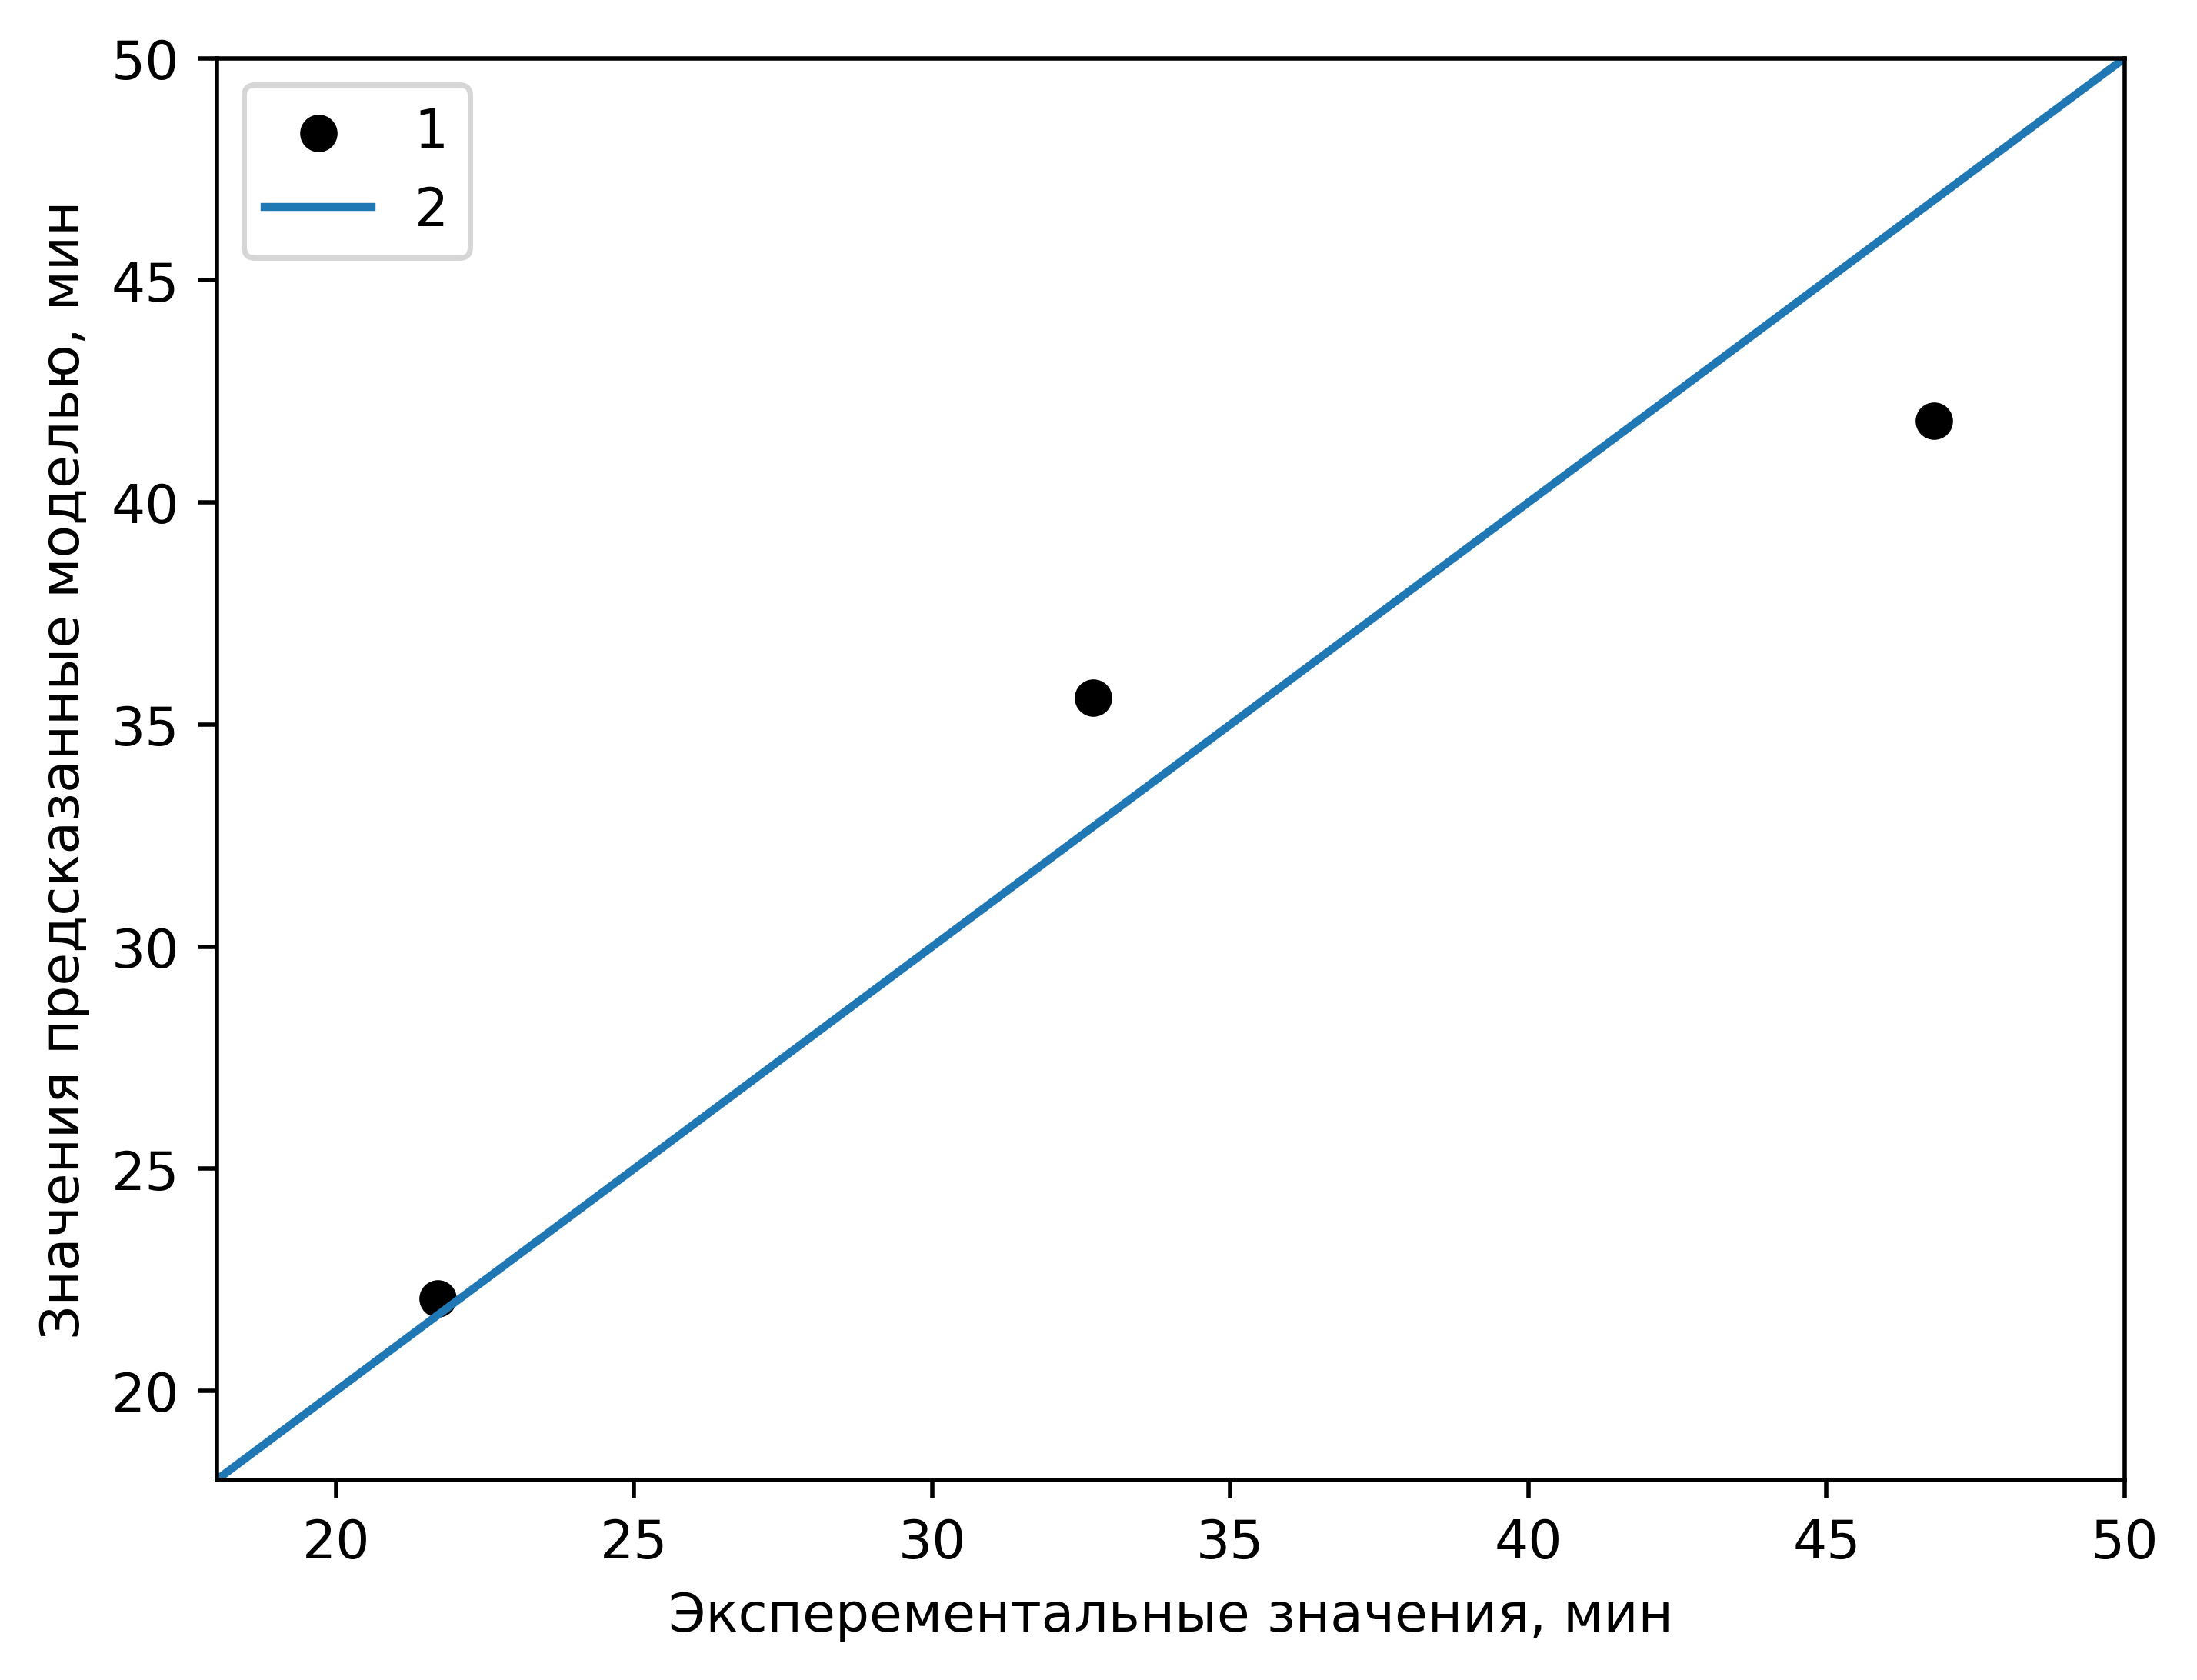

In [ ]:
plt.figure(dpi = 500, facecolor = "white")
plt.scatter(y_true, y_pred, color = 'k', label='1')
plt.plot(np.arange(0.0, 50, 0.01), np.arange(0.0, 50, 0.01), label='2')
plt.ylim(18, 50)
plt.xlabel('Эксперементальные значения, мин')
plt.ylabel('Значения предсказанные моделью, мин')
plt.xlim(18, 50)
plt.legend()

In [ ]:
y_pred = clf_10.predict(probniy_tick_sc)

,diphenylamine,Irganox L-135,agidol,Irganox L-06,Irganox L-57,Irganox L-67,TPSA,PEOE_VSA9,VSA_EState6,MolMR,...,TPSA_1,PEOE_VSA9_1,VSA_EState6_1,MolMR_1,PEOE_VSA7_1,BCUT2D_MWLOW_1,BCUT2D_LOGPLOW_1,Chi2v_1,FpDensityMorgan3_1,VSA_EState4_1
0,0.30,0.30,0.00,0.00,0.00,0.00,12.03,13.71,-6.86,56.17,...,46.53,12.04,-5.29,159.72,40.27,-0.25,-2.61,5.82,1.70,-18.28
1,0.90,0.30,0.00,0.00,0.00,0.00,12.03,13.71,-6.86,56.17,...,46.53,12.04,-5.29,159.72,40.27,-0.25,-2.61,5.82,1.70,-18.28
2,0.30,0.90,0.00,0.00,0.00,0.00,12.03,13.71,-6.86,56.17,...,46.53,12.04,-5.29,159.72,40.27,-0.25,-2.61,5.82,1.70,-18.28
3,0.90,0.90,0.00,0.00,0.00,0.00,12.03,13.71,-6.86,56.17,...,46.53,12.04,-5.29,159.72,40.27,-0.25,-2.61,5.82,1.70,-18.28
4,0.30,0.00,0.30,0.00,0.00,0.00,12.03,13.71,-6.86,56.17,...,20.23,2.74,-3.68,70.24,28.81,-0.25,-2.57,3.20,1.88,-14.58
5,0.90,0.00,0.30,0.00,0.00,0.00,12.03,13.71,-6.86,56.17,...,20.23,2.74,-3.68,70.24,28.81,-0.25,-2.57,3.20,1.88,-14.58
6,0.30,0.00,0.90,0.00,0.00,0.00,12.03,13.71,-6.86,56.17,...,20.23,2.74,-3.68,70.24,28.81,-0.25,-2.57,3.20,1.88,-14.58
7,0.90,0.00,0.90,0.00,0.00,0.00,12.03,13.71,-6.86,56.17,...,20.23,2.74,-3.68,70.24,28.81,-0.25,-2.57,3.20,1.88,-14.58
8,0.00,0.30,0.00,0.30,0.00,0.00,46.53,12.04,-5.29,159.72,...,3.24,16.45,-16.66,110.68,49.01,-0.25,-2.75,4.87,2.24,-13.81
9,0.00,0.30,0.00,0.90,0.00,0.00,46.53,12.04,-5.29,159.72,...,3.24,16.45,-16.66,110.68,49.01,-0.25,-2.75,4.87,2.24,-13.81


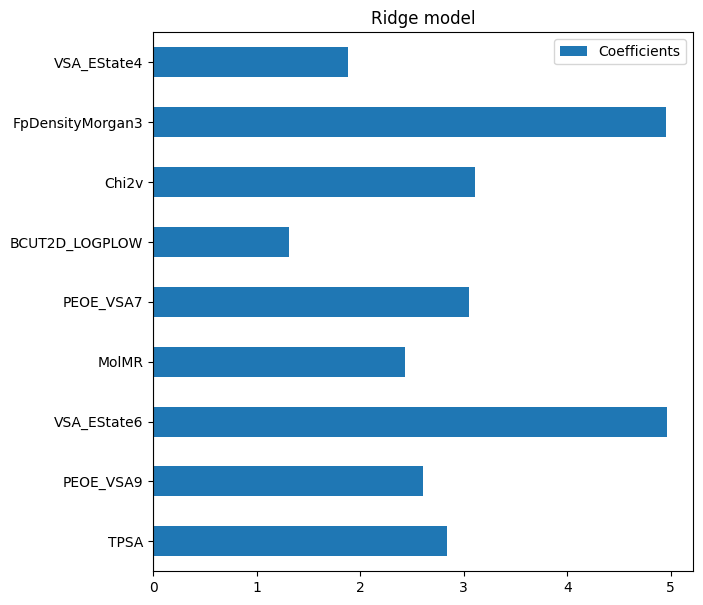

In [ ]:
import matplotlib.pyplot as plt

coefs = pd.DataFrame(
   clf_10.coef_,
   columns=['Coefficients'], index=x.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [ ]:
coefs

,Coefficients
TPSA,2.84
PEOE_VSA9,2.61
VSA_EState6,4.97
MolMR,2.43
PEOE_VSA7,3.05
BCUT2D_LOGPLOW,1.31
Chi2v,3.11
FpDensityMorgan3,4.96
VSA_EState4,1.89


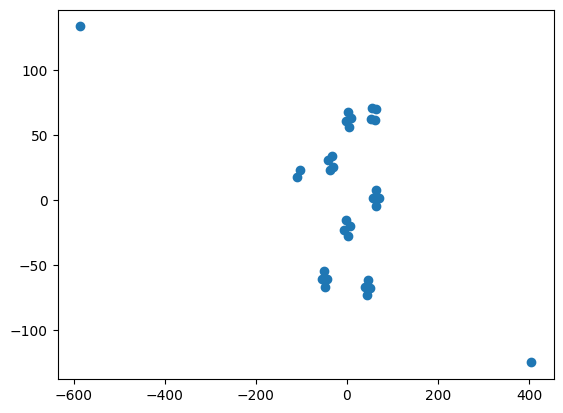

In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(x)
plt.scatter(Y_test, X_embedded[:,1])
plt.show()

In [ ]:
X_embedded


array([[-110.30926  ,   17.827768 ],
       [-586.0896   ,  133.62576  ],
       [-102.445694 ,   22.967817 ],
       [ 404.82803  , -124.64238  ],
       [   5.848285 ,  -19.89151  ],
       [  -1.665596 ,  -15.452031 ],
       [  -5.4464164,  -22.700626 ],
       [   1.4537741,  -27.52115  ],
       [   2.6345408,   68.231155 ],
       [   4.6750097,   56.09472  ],
       [  -2.2039802,   61.262493 ],
       [   9.537122 ,   63.15321  ],
       [  45.18968  ,  -61.040585 ],
       [  43.972824 ,  -73.03255  ],
       [  50.581425 ,  -67.65561  ],
       [  38.55049  ,  -66.47296  ],
       [  57.320396 ,    1.7399464],
       [  63.392017 ,    7.7325063],
       [  69.63125  ,    1.9207436],
       [  63.59651  ,   -4.114846 ],
       [ -49.168373 ,  -66.416985 ],
       [ -43.32633  ,  -60.201714 ],
       [ -55.329674 ,  -60.527206 ],
       [ -49.521877 ,  -54.28109  ],
       [  54.517124 ,   71.27137  ],
       [  61.8165   ,   61.807697 ],
       [  53.33122  ,   62.81936  ],
 

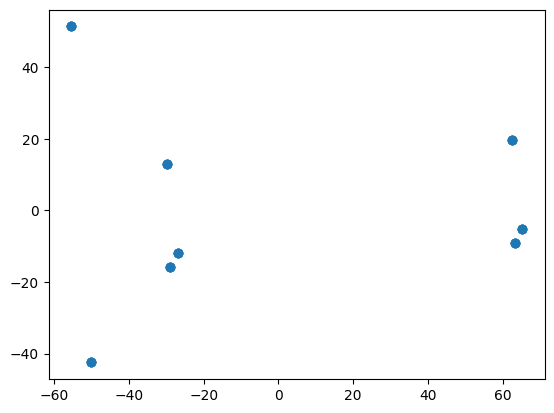

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# pca.fit(x)
Xt = pca.fit_transform(x)
plt.scatter(Xt[:,0], Xt[:,1])
# plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.show()

In [ ]:
descript_ds = pd.read_csv('/content/drive/MyDrive/gpn_practice/data_208_discriptors.csv')
descript_ds.drop(['Unnamed: 0'], axis = 1, inplace = True)
descript_ds.set_index('name', inplace=True)

import joblib
# введите отобранные фичи
descript_ds = descript_ds[['TPSA', 'PEOE_VSA9', 'VSA_EState6', 'MolMR', 'PEOE_VSA7',
       'BCUT2D_MWLOW', 'BCUT2D_LOGPLOW', 'Chi2v', 'FpDensityMorgan3',
       'VSA_EState4']]
# clf_10 = linear_model.PassiveAggressiveRegressor( C=0.7, fit_intercept=True, max_iter=1000, tol=0.001, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, shuffle=True, verbose=0, loss='epsilon_insensitive', epsilon=0.1, random_state=None, warm_start=False, average=False)
# clf_10.fit(x_sc, y)
clf_10 = joblib.load('/content/best_model_1_10_8.pkl')
# введите данные концентраций
p = {'diphenylamine': [0.6],	'Irganox L-135': [0.0],	'agidol': [0.6],	'Irganox L-06':[0.0],	'Irganox L-57': [0.0],	'Irganox L-67':[0.0]}

agid_dpa_dict = {}
for k in np.arange(0.1, 1, 0.1):
  row_df = []
  for j in np.arange(0.1, 1, 0.1):
    d = {'diphenylamine': [0],	'Irganox L-135': [0.0],	'agidol': [0],	'Irganox L-06':[0.0],	'Irganox L-57': [0.0],	'Irganox L-67':[0.0]}
    test_tick = pd.DataFrame.from_dict(d)
    test_tick
    trytich = test_tick.T
    use_trytich = pd.DataFrame(trytich.loc['agidol'])
    agid = pd.DataFrame(trytich.loc['diphenylamine'])
    use_trytich = pd.concat([agid.T, use_trytich.T])
    print(use_trytich)
    features = []
    for i in use_trytich.index:
      if i == 'diphenylamine':
        feat = {}
        feat_df = pd.DataFrame(descript_ds.loc['diphenylamine'].T)
        feat_df = feat_df.T
        feat_df.reset_index(drop = True, inplace = True)
        feat_dic = feat_df.to_dict('series')
        feat['name'] = 'diphenylamine'
        feat['descriptors'] = feat_dic
        features.append(feat)
      if i == 'Irganox L-135':
        feat = {}
        feat_df = pd.DataFrame(descript_ds.loc['Irganox L-135'].T)
        feat_df = feat_df.T
        feat_df.reset_index(drop = True, inplace = True)
        feat_dic = feat_df.to_dict('series')
        feat['name'] = 'Irganox L-135'
        feat['descriptors'] = feat_dic
        features.append(feat)
      if i == 'agidol':
        feat = {}
        feat_df = pd.DataFrame(descript_ds.loc['agidol'].T)
        feat_df = feat_df.T
        feat_df.reset_index(drop = True, inplace = True)
        feat_dic = feat_df.to_dict('series')
        feat['name'] = 'agidol'
        feat['descriptors'] = feat_dic
        features.append(feat)
      if i == 'Irganox L-06':
        feat = {}
        feat_df = pd.DataFrame(descript_ds.loc['Irganox L-06'].T)
        feat_df = feat_df.T
        feat_df.reset_index(drop = True, inplace = True)
        feat_dic = feat_df.to_dict('series')
        feat['name'] = 'Irganox L-06'
        feat['descriptors'] = feat_dic
        features.append(feat)
      if i == 'Irganox L-57':
        feat = {}
        feat_df = pd.DataFrame(descript_ds.loc['Irganox L-57'].T)
        feat_df = feat_df.T
        feat_df.reset_index(drop = True, inplace = True)
        feat_dic = feat_df.to_dict('series')
        feat['name'] = 'Irganox L-57'
        feat['descriptors'] = feat_dic
        features.append(feat)
      if i == 'Irganox L-67':
        feat = {}
        feat_df = pd.DataFrame(descript_ds.loc['Irganox L-67'].T)
        feat_df = feat_df.T
        feat_df.reset_index(drop = True, inplace = True)
        feat_dic = feat_df.to_dict('series')
        feat['name'] = 'Irganox L-67'
        feat['descriptors'] = feat_dic
        features.append(feat)
    print(features)
    feat_1 = pd.DataFrame.from_dict(features[0]['descriptors'])
    feat_2 = pd.DataFrame.from_dict(features[1]['descriptors'])
    features_columns = descript_ds.columns.tolist()
    second_feature = []
    for i in features_columns:
      kek = i + '_1'
      second_feature.append(kek)

    for i,j in zip(feat_2.columns.tolist(), second_feature):
        feat_2.rename(columns={i: j}, inplace = True)

    probniy_tick = pd.concat([test_tick, feat_1, feat_2], axis = 1)
    probniy_tick_sc = scaler.transform(probniy_tick)

    print("real value", clf_10.predict(probniy_tick_sc))
    row_df.append(clf_10.predict(probniy_tick_sc)[0])
  agid_dpa_dict[k] = row_df
  


In [ ]:
agid_dpa_dict

In [ ]:
# agid_dpa_dict
agid_dpa_df = pd.DataFrame.from_dict(agid_dpa_dict, orient='index', columns=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# agid_dpa_df = agid_dpa_df.T
agid_dpa_df.to_excel('agidol_dpa_0.xlsx')

In [ ]:
# agid_dpa_dict
agid_dpa_df = pd.DataFrame.from_dict(agid_dpa_dict, orient='index', columns=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# agid_dpa_df = agid_dpa_df.T
agid_dpa_df

,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90
0.10,10.30,11.16,12.03,12.90,13.76,14.63,15.50,16.37,17.23
0.20,11.79,12.65,13.52,14.39,15.25,16.12,16.99,17.85,18.72
0.30,13.27,14.14,15.01,15.87,16.74,17.61,18.47,19.34,20.21
0.40,14.76,15.63,16.50,17.36,18.23,19.10,19.96,20.83,21.70
0.50,16.25,17.12,17.98,18.85,19.72,20.58,21.45,22.32,23.19
0.60,17.74,18.60,19.47,20.34,21.21,22.07,22.94,23.81,24.67
0.70,19.23,20.09,20.96,21.83,22.69,23.56,24.43,25.29,26.16
0.80,20.71,21.58,22.45,23.32,24.18,25.05,25.92,26.78,27.65
0.90,22.20,23.07,23.94,24.80,25.67,26.54,27.40,28.27,29.14


In [ ]:
pipi = []
for i in np.arange(0.1, 1, 0.1):
  pipi.append(np.around(i, 3))
pipi

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [ ]:
import joblib
joblib.dump(clf_10, "best_model_1_10_8.pkl")

['best_model_1_10_8.pkl']

In [ ]:
joblib.dump(scaler, "scaler_for_best_model.pkl")

['scaler_for_best_model.pkl']

In [ ]:
model = joblib.load('/content/best_model_1_10_8.pkl')
s = model.predict(probniy_tick_sc)
s

array([46.30110005])

In [ ]:
# irganox 135 57
